Hamlet Challenge 

Construct a report that covers the following three questions. The report is intended to describe your analysis and present your results for a mixed technical audience.
1.	Show the number of lines said per character throughout the play.
2.	Make a word cloud of unusual words in the script
3.	Compute the sentiment score for each scene.

In [1]:
## importing necessary libraries
# importing basics
import numpy as np
import pandas as pd
# importing libraries for text processing
import re
import string
import nltk
# importing libraries for plotting
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
# reading in hamlet.txt (if there is time, figure out how to read this directly from github repository)
f=open('hamlet.txt')
hamlet_raw=f.read()

Part 1: Show the number of lines said per character throughout the play.

Steps involved in cleaning the data:
1. The scene descriptions are included in the text in '[]'. These are not considered dialogues and hence are removed.
2. Remove excess spaces.

In [3]:
#removing excess space
nospace= ' '.join(hamlet_raw.split())
# removing scene descriptors from the text.
dialogue_clean=re.sub("[\[].*?[\]]", "", nospace)
print(dialogue_clean[0:500])

HAMLET DRAMATIS PERSONAE CLAUDIUS king of Denmark. (KING CLAUDIUS:) HAMLET son to the late, and nephew to the present king. POLONIUS lord chamberlain. (LORD POLONIUS:) HORATIO friend to Hamlet. LAERTES son to Polonius. LUCIANUS nephew to the king. VOLTIMAND | | CORNELIUS | | ROSENCRANTZ | courtiers. | GUILDENSTERN | | OSRIC | A Gentleman, (Gentlemen:) A Priest. (First Priest:) MARCELLUS | | officers. BERNARDO | FRANCISCO a soldier. REYNALDO servant to Polonius. Players. (First Player:) (Player K


All characters are listed in the preamble. Major characters' names are capitalised while minor characters aren't. For the purposes of this analysis, we will capitalise minor character' names as well.

In [4]:
#creating a list of minor characters from preamble.
og_minor=["Gentlemen", "First Priest","First Player", "Player King", "Player Queen","First Clown", "Second Clown", "First Ambassador", "Lord", "First Sailor", "Messenger", "Ghost"]
#capitalised replacements. Roman numerals are used to signal "first", "second" etc.
new_minor=["GENTLEMEN","PRIESTI", "PLAYERI", "PLAYERKING", "PLAYERQUEEN", "CLOWNI", "CLOWNII", "AMBASSADORI", "LORD", "SAILORI", "MESSENGER", "GHOST"]

print(og_minor, new_minor)

['Gentlemen', 'First Priest', 'First Player', 'Player King', 'Player Queen', 'First Clown', 'Second Clown', 'First Ambassador', 'Lord', 'First Sailor', 'Messenger', 'Ghost'] ['GENTLEMEN', 'PRIESTI', 'PLAYERI', 'PLAYERKING', 'PLAYERQUEEN', 'CLOWNI', 'CLOWNII', 'AMBASSADORI', 'LORD', 'SAILORI', 'MESSENGER', 'GHOST']


In [5]:
fin_dialogue=dialogue_clean
char=np.arange(0,len(og_minor))
#for loop to replace words in og_minor with words from new_minor.
for c in char:
    fin_dialogue=re.sub(og_minor[c], new_minor[c],fin_dialogue)

print(fin_dialogue[0:500])

HAMLET DRAMATIS PERSONAE CLAUDIUS king of Denmark. (KING CLAUDIUS:) HAMLET son to the late, and nephew to the present king. POLONIUS lord chamberlain. (LORD POLONIUS:) HORATIO friend to Hamlet. LAERTES son to Polonius. LUCIANUS nephew to the king. VOLTIMAND | | CORNELIUS | | ROSENCRANTZ | courtiers. | GUILDENSTERN | | OSRIC | A Gentleman, (GENTLEMEN:) A Priest. (PRIESTI:) MARCELLUS | | officers. BERNARDO | FRANCISCO a soldier. REYNALDO servant to Polonius. Players. (PLAYERI:) (PLAYERKING:) (PLAY


Finding the individual charaters: Now that our text is ready for counting sentences, finding all the capitalised words in the text that are 4 letters or longer. Words such as Act, Scene, King, Queen are removed as they don't directly reference to characters.

In [6]:
# Finding all capital words that are 4 or more characters long.
caps=re.findall("[A-Z]{4,}", fin_dialogue)
# Removing title words.
titlewords= ['KING', 'QUEEN', 'PRINCE', 'ACT','SCENE','DRAMATIS','PERSONAE']
char=[]
for w in caps:
    if w not in titlewords:
        char.append(w)
#Getting the names of unique characters.
characters=np.unique(char)
print(characters)

['AMBASSADORI' 'BERNARDO' 'CLAUDIUS' 'CLOWNI' 'CLOWNII' 'CORNELIUS'
 'FORTINBRAS' 'FRANCISCO' 'GENTLEMEN' 'GERTRUDE' 'GHOST' 'GUILDENSTERN'
 'HAMLET' 'HORATIO' 'LAERTES' 'LORD' 'LUCIANUS' 'MARCELLUS' 'MESSENGER'
 'OPHELIA' 'OSRIC' 'PLAYERI' 'PLAYERKING' 'PLAYERQUEEN' 'POLONIUS'
 'PRIESTI' 'REYNALDO' 'ROSENCRANTZ' 'SAILORI' 'VOLTIMAND']


Counting number of sentences per character.

In [7]:
# making a function to get the number of sentences in the dialogue
from nltk.tokenize import sent_tokenize

def getnumsent(dia):
    sentences=sent_tokenize(dia)
    num_sent=len(sentences)
    return num_sent

Splicing the text to get the number of sentences spoken by each character.

In [8]:
#initiate for loop to iterate through the text for each character
chararray=np.arange(0,len(characters))
each_char=[] 
total_sent=[]
startidx=[]
for c in chararray:
    charname=characters[c]
    iter=re.finditer(charname,fin_dialogue) #getting the index where each characters' dialogue begins
    idx=[m.start(0) for m in iter]
    numsent=0 #initiating a counter for the number of sentences spoken by each character
    for i in idx[1:]:
        start_idx=i+len(charname)+1 #getting the starting index of the text (starting from the character ...
        #immediately after the name of the character)
        dial=fin_dialogue[start_idx:]#dialogue of interes
        #print(dial[1:100])
        char2=re.search("[A-Z]{2,}",dial)#finding the next speaker/ capitalised word with more than two characters...
        #is chosen here to include words like Act and Scene which usually signal the end of dialogue.
        if not char2:
            endidx=len(fin_dialogue)-start_idx#if char 2 is empty, it means we've reached the end of the text/
        else:
            endidx=char2.start()# If we haven't reached the end of the text, the end index is where the next
            #character starts speaking.
        text=dial[:endidx]# this is the dialogue spoken by the character in this instance
        num=getnumsent(text)#number of sentences spoken
        numsent=numsent+num #cumulative total of sentences spoken
        startidx.append(start_idx) #saving the starting index for later use
        each_char.append([charname,start_idx,text, num]) #saving the character name, starting index, the text spoken...
        #and the number of sentences for later use.
    total_sent.append([charname, numsent]) #list of the characters and the number of sentences they spoke
    all_data=pd.DataFrame(each_char,columns =['Name', 'Start', 'Text', 'Num_sent'])#dataframe of each_char for ease...
    #of use.
totalsentences=pd.DataFrame(total_sent, columns=['Name', 'Total_sent']) #dataframe of total_sent for ease of use
#display(totalsentences, all_data.head())

totalsentences_final=totalsentences.sort_values('Total_sent')
totalsentences_final.head()

,Name,Total_sent
0,AMBASSADORI,0
25,PRIESTI,0
20,OSRIC,0
16,LUCIANUS,1
5,CORNELIUS,1


Plotting the number sentences spoken by each character. We will split the data into major (speak more than 50 lines) and minor (speaks less than 50 lines) characters

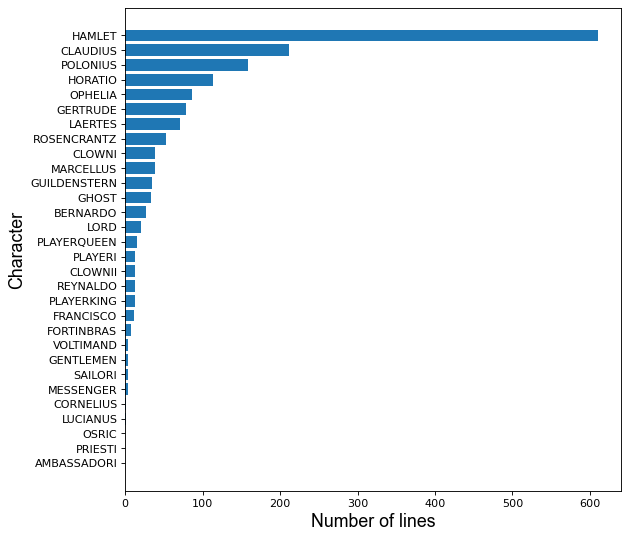

In [9]:
y=totalsentences_final['Name']
x=totalsentences_final['Total_sent']
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k') # formatting the plot
ax=plt.barh(y,x)
hfont = {'fontname':'Arial', 'size':16}# Setting font and font size
# Inserting X and Y labels
plt.xlabel('Number of lines', **hfont)
plt.ylabel('Character', **hfont)

plt.show #displaying the figure
plt.savefig('all.png', bbox_inches='tight')#saving the figure


Additional analysis examining major and minor character sentence numbers

In [10]:
maj=totalsentences_final[totalsentences_final["Total_sent"]>50] #major characters
minor=totalsentences_final[totalsentences_final["Total_sent"]<=50]#minor characters

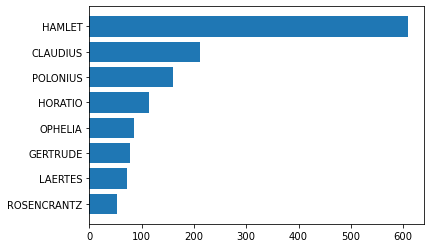

In [11]:
#plotting amajor characters

y=maj["Name"]
x=maj["Total_sent"]
plt.barh(y,x)

plt.show
plt.savefig('majorchar.png', bbox_inches='tight')

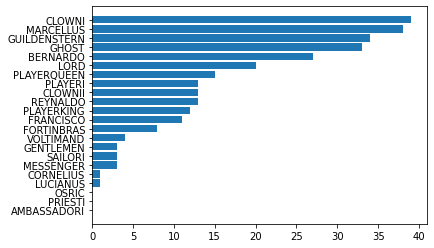

In [12]:
#plotting minor characters

ymin=minor["Name"]
xmin=minor["Total_sent"]
plt.barh(minor["Name"],minor["Total_sent"])

plt.show
plt.savefig('minorchar.png', bbox_inches='tight')

Part 2: Make a word cloud of unusual words in the script
For this section, we will make a bag of words containing only the unusual words using the following steps
1. Remove all punctuation from the text.
2. Remove all capitalisation.
3. Use word_tokenize to isolate the words.
4. Use part of speech tagging to tag words then lemmatise the words.
4. Then remove stopwords (both current and shakespearean, character names and common words) to get final set.

In [13]:
#importing some additional libraries

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords, words, wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from collections import defaultdict


In [14]:
#Removing all punctuation from the hamlet_raw.
nopunct_text=fin_dialogue.translate(str.maketrans('', '', string.punctuation))

#Make all letters lower case
lower_text=nopunct_text.lower()

print(lower_text[0:500])


hamlet dramatis personae claudius king of denmark king claudius hamlet son to the late and nephew to the present king polonius lord chamberlain lord polonius horatio friend to hamlet laertes son to polonius lucianus nephew to the king voltimand   cornelius   rosencrantz  courtiers  guildenstern   osric  a gentleman gentlemen a priest priesti marcellus   officers bernardo  francisco a soldier reynaldo servant to polonius players playeri playerking playerqueen two clowns gravediggers clowni clowni


Tokenising words

In [15]:
#tokenize words

tokenizedwords=word_tokenize(lower_text, 'English')


Parts of speech tagging

In [16]:

tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

text=tokenizedwords;
lemmatizer=WordNetLemmatizer()
lemma=[]
for token, tag in pos_tag(text):
    lemma.append(lemmatizer.lemmatize(token, tag_map[tag[0]]))
print(lemma[1:100])

['dramatis', 'persona', 'claudius', 'king', 'of', 'denmark', 'king', 'claudius', 'hamlet', 'son', 'to', 'the', 'late', 'and', 'nephew', 'to', 'the', 'present', 'king', 'polonius', 'lord', 'chamberlain', 'lord', 'polonius', 'horatio', 'friend', 'to', 'hamlet', 'laertes', 'son', 'to', 'polonius', 'lucianus', 'nephew', 'to', 'the', 'king', 'voltimand', 'cornelius', 'rosencrantz', 'courtier', 'guildenstern', 'osric', 'a', 'gentleman', 'gentleman', 'a', 'priest', 'priesti', 'marcellus', 'officer', 'bernardo', 'francisco', 'a', 'soldier', 'reynaldo', 'servant', 'to', 'polonius', 'player', 'playeri', 'playerking', 'playerqueen', 'two', 'clown', 'gravedigger', 'clowni', 'clownii', 'fortinbras', 'prince', 'of', 'norway', 'prince', 'fortinbras', 'a', 'captain', 'english', 'ambassador', 'ambassadori', 'gertrude', 'queen', 'of', 'denmark', 'and', 'mother', 'to', 'hamlet', 'queen', 'gertrude', 'ophelia', 'daughter', 'to', 'polonius', 'lord', 'ladies', 'officer', 'soldier', 'sailor', 'messenger']


In [17]:
# function to remove words in list2 from list1

def remove_words(list1,list2):
    cleaned_list=[]
    for word in list1:
        if word not in list2:
            cleaned_list.append(word)
    return(cleaned_list)

Removing stop words.
First we remove common stopwords using the NLTK inbuilt stopword list. Then, we use a custom list generated by editing the list of common shakespearean words from https://www.stagemilk.com/common-shakespeare-words-explained/. Any words that had similar meanings to those words in the stopwords.words('english') list were kept.

In [18]:
#import custom list
f=open('shakespeare_stopwords.txt')
sstopwords=f.read()
specialstopwords=word_tokenize(sstopwords)
print(specialstopwords)

['anon', 'art', 'ay', 'aye', 'belike', 'betwixt', 'dost', 'doth', 'ere', 'haply', 'hast', 'hath', 'hark', 'hie', 'hither', 'hence', 'methinks', 'nay', 'perchance', 'shall', 'thee', 'tis', 'thou', 'thine', 'thither', 'thy', 'twas', 'wast', 'whence', 'wherefore', 'withal', 'yea', 'yond', 'yonder']


In [23]:
#create a list of stop words including special stop words
st=stopwords.words('english')
st.extend(specialstopwords)
#remove all stop words
sw_rem=remove_words(lemma,st)
print(len(lemma),len(sw_rem))

26161 12886


Next we remove character names. We already have a list of characters we pulled out earlier called characters.

In [24]:
characters_str=np.array_str(characters)# converting to string.
title_str=str(titlewords)#converting title words to string
char_all=characters_str,title_str #combining characters and title words
char_nopunct=str(char_all).translate(str.maketrans('', '', string.punctuation))#removing punctuations from char_all...
#introduced while converting to string.
char_lower=char_nopunct.lower()#Converting to lower case
char=word_tokenize(char_lower)#Making a list of individual words.
char.extend(['cornelius','guildenstern', 'messenger', 'polonius', 'gentleman', 'denmark', 'norway', 'elsinore','england', 'france', 'poland', 'english'])#adding additional words that were missed in the above process.
print(char)#printing final list of proper nouns.


['ambassadori', 'bernardo', 'claudius', 'clowni', 'clownii', 'corneliusn', 'fortinbras', 'francisco', 'gentlemen', 'gertrude', 'ghost', 'guildensternn', 'hamlet', 'horatio', 'laertes', 'lord', 'lucianus', 'marcellus', 'messengern', 'ophelia', 'osric', 'playeri', 'playerking', 'playerqueen', 'poloniusn', 'priesti', 'reynaldo', 'rosencrantz', 'sailori', 'voltimand', 'king', 'queen', 'prince', 'act', 'scene', 'dramatis', 'personae', 'cornelius', 'guildenstern', 'messenger', 'polonius', 'gentleman', 'denmark', 'norway', 'elsinore', 'england', 'france', 'poland', 'english']


In [27]:
#remove characters from the main list
char_rem=remove_words(sw_rem,char)

print(len(char_rem))


11078


Defining unusual words
Used a list of the 1000 most common words in english language published by Education First, Australia- published : https://www.ef-australia.com.au/english-resources/english-vocabulary/top-1000-words/. All the commonly used words were removed.

In [28]:
#list of common words
f=open('commonwords.txt')
common_raw=f.read()
commonwords=word_tokenize(common_raw)
print(commonwords[0:50])



['a', 'ability', 'able', 'about', 'above', 'accept', 'according', 'account', 'across', 'act', 'action', 'activity', 'actually', 'add', 'address', 'administration', 'admit', 'adult', 'affect', 'after', 'again', 'against', 'age', 'agency', 'agent', 'ago', 'agree', 'agreement', 'ahead', 'air', 'all', 'allow', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'American', 'among', 'amount', 'analysis', 'and', 'animal', 'another', 'answer', 'any', 'anyone', 'anything']


In [29]:
#Getting the list of unusual words
uncommon_words=remove_words(char_rem, commonwords)
#finally we get words longer than 9 characters to find the unusual words
unusual_words=[]
for word in uncommon_words:
    if len(word)>9:
        unusual_words.append(word)


In [30]:
final_words=str(unusual_words)
print(len(final_words),final_words[:50])


5861 ['chamberlain', 'gravedigger', 'ambassador', 'appa


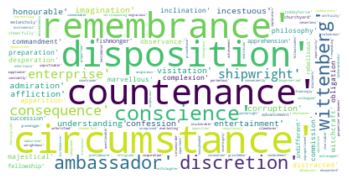

In [31]:
wordcloud = WordCloud(background_color='white').generate(final_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud = wordcloud.to_file('long.png')


Also looking at shorter words


In [32]:
unusual_words2=[]
for word in uncommon_words:
    if len(word)>5 and len(word)<=9:
        unusual_words2.append(word)

In [33]:
final_words2=str(unusual_words2)
#print(len(final_words2),final_words2)

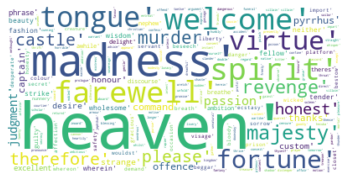

In [34]:
wordcloud = WordCloud(background_color='white').generate(final_words2)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud = wordcloud.to_file('short.png')

Making a list of only unusual shakespearean terms by removing all words in the NLTK built in dictionary/

In [35]:
all=words.words()#all words in the dictionary
all_rem=remove_words(lemma,all)
char_rem2=remove_words(all_rem, char)
len(all)

236736

In [36]:
unusual_words3=[]
for word in char_rem2:
    if len(word)>3:
        unusual_words3.append(word)
print(unusual_words3[1:100])

['appeard', 'dreaded', 'usurpst', 'armour', 'frownd', 'sunday', 'doth', 'jointlabourer', 'appeard', 'prickd', 'esteemd', 'seald', 'returnd', 'designd', 'sharkd', 'resolutes', 'doth', 'romage', 'rome', 'julius', 'graf', 'roman', 'neptune', 'climatures', 'hast', 'hast', 'uphoarded', 'doth', 'shrillsounding', 'hies', 'saviour', 'singeth', 'hallowd', 'heard', 'defeated', 'barrd', 'colleagued', 'faild', 'hears', 'purposeto', 'delated', 'dane', 'favour', 'laboursome', 'seald', 'hang', 'vailed', 'knowst', 'havior', 'passeth', 'persever', 'unschoold', 'dearest', 'wittenberg', 'wittenberg', 'sits', 'respeaking', 'fixd', 'selfslaughter', 'hyperion', 'hang', 'ontfrailty', 'followd', 'niobe', 'tearswhy', 'mournd', 'longermarried', 'hercules', 'horatioor', 'wittenberg', 'wittenberg', 'fellowstudent', 'followd', 'fathermethinks', 'encounterd', 'capape', 'walkd', 'oppressd', 'fearsurprised', 'distil', 'deliverd', 'watchd', 'vanishd', 'honourd', 'armd', 'armd', 'lookd', 'fixd', 'stayd', 'grizzledno', 

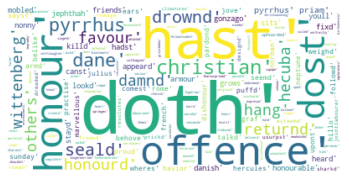

In [37]:
#making the word cloud
final_words3=str(unusual_words3)
wordcloud = WordCloud(background_color='white').generate(final_words3)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud = wordcloud.to_file('shake.png')

In [38]:
print(['offense' in all, 'offence' in all])#american vs british spelling.

[True, False]


Part 3: Compute the sentiment score for each scene.



In [39]:
#analyse sentiment intensity analyser from nltk. 
from nltk.sentiment.vader import SentimentIntensityAnalyzer as sid

The start of every scene begins with the words "HAMLET", "ACT n", "SCENE n". To get the dialogues within each scene, we will first get the start index of each scene. Each scene is then the text between the start index of two consecutive scenes. As the text in [] brackets only signal the entrance and exit of characters, we use the text stored in "fin_dialogue".

In [40]:
#get all instances of "SCENE"
iter=re.finditer("SCENE",fin_dialogue)
sceneidx=[m.start(0) for m in iter]


Making a function for sentiment analysis

In [41]:
# function to analyse sentiment
def sentiment_analyse(sentiment_text):
        score=sid().polarity_scores(sentiment_text)
        return(score)

The first instance of SCENE occurs in the preamble so we will ignore it and begin indexing from 1. 

In [42]:
#making a for loop to iterate through each scene and compute its sentiment score
#initiating some blank variables to save sentiment scores in.
sent_neg=[] # negative sentiment score
sent_pos=[] #postive sentiment score
sent_neu=[] # neutral sentiment score
sent_compound=[] # compound sentiment score
scene=[] #sentiment score for the scene.
for sc in np.arange(1,len(sceneidx)):
   #getting start and end index for each scene
    st=sceneidx[sc]
    if st==sceneidx[-1]:
        en=len(fin_dialogue)-1
    else:
        en=sceneidx[sc+1]
    text=fin_dialogue[st:en] #indexing out the text for current scene
    #print(text[:1000])
    #now to do a sentiment analysis on each sentence in the scene.
    sentences=sent_tokenize(text)
    for sent in sentences:
        sent_score=sentiment_analyse(sent)
        sent_neg.append(sent_score['neg'])
        sent_pos.append(sent_score['pos'])
        sent_neu.append(sent_score['neu'])
        sent_compound.append(sent_score['compound'])
        scene.append(sc)
    print(["Analysis of scene "+ str(sc)+" is complete"])
   

['Analysis of scene 1 is complete']
['Analysis of scene 2 is complete']
['Analysis of scene 3 is complete']
['Analysis of scene 4 is complete']
['Analysis of scene 5 is complete']
['Analysis of scene 6 is complete']
['Analysis of scene 7 is complete']
['Analysis of scene 8 is complete']
['Analysis of scene 9 is complete']
['Analysis of scene 10 is complete']
['Analysis of scene 11 is complete']
['Analysis of scene 12 is complete']
['Analysis of scene 13 is complete']
['Analysis of scene 14 is complete']
['Analysis of scene 15 is complete']
['Analysis of scene 16 is complete']
['Analysis of scene 17 is complete']
['Analysis of scene 18 is complete']
['Analysis of scene 19 is complete']


In [43]:
#Making a data frame for ease of use
df=pd.DataFrame([scene,sent_neg,sent_pos,sent_neu, sent_compound])
df1=df.T #transposing the data frame so the columns indicate scenes, and each of the sentiment scores.
df1.columns=["scene","neg", "pos", "neu", "compound"]
display(df1)


,scene,neg,pos,neu,compound
0,1.0,0.000,0.000,1.000,0.0000
1,1.0,0.000,0.000,1.000,0.0000
2,1.0,0.000,0.000,1.000,0.0000
3,1.0,0.000,0.000,1.000,0.0000
4,1.0,0.000,0.000,1.000,0.0000
...,...,...,...,...,...
1636,19.0,0.000,0.328,0.672,0.9134
1637,19.0,0.140,0.096,0.764,-0.1779
1638,19.0,0.000,0.224,0.776,0.3818
1639,19.0,0.000,0.225,0.775,0.5390


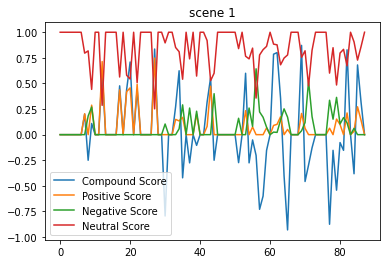

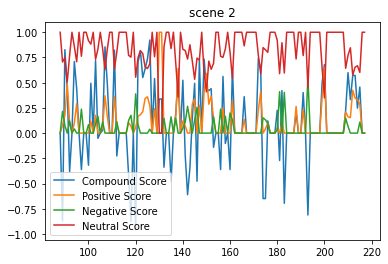

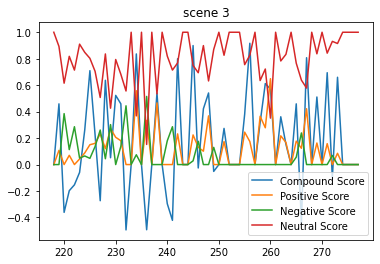

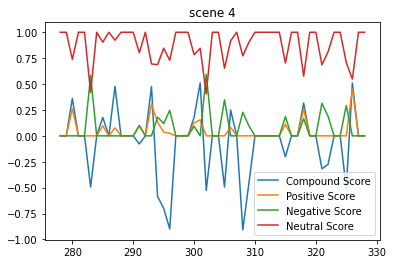

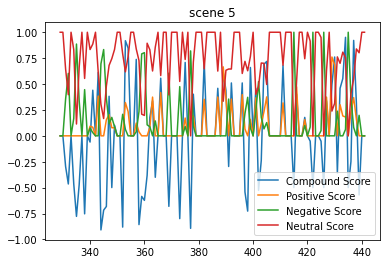

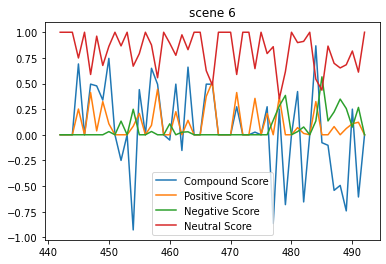

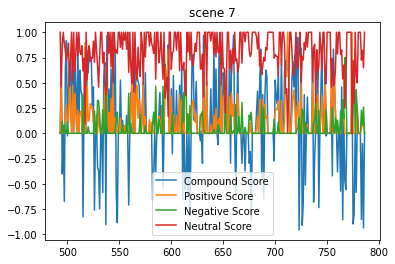

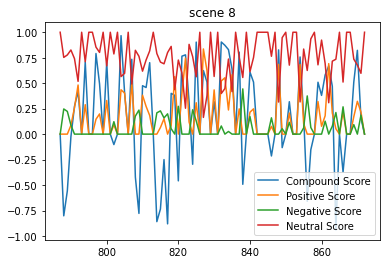

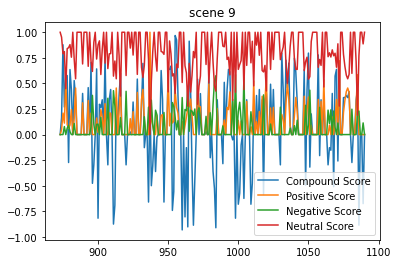

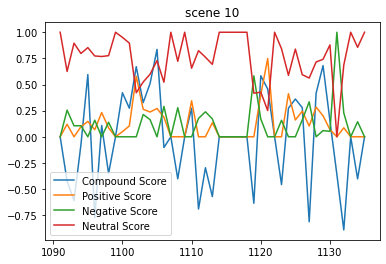

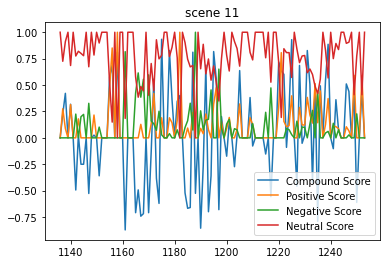

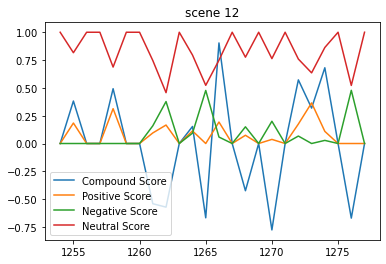

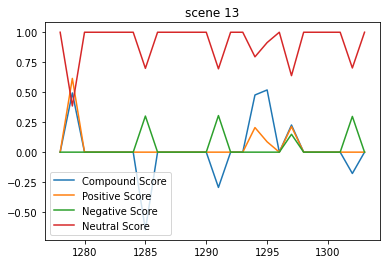

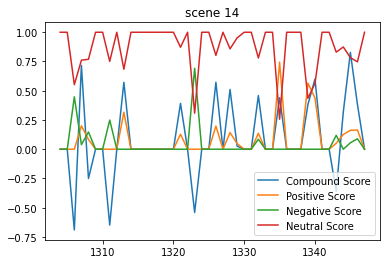

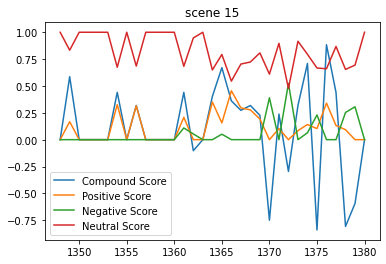

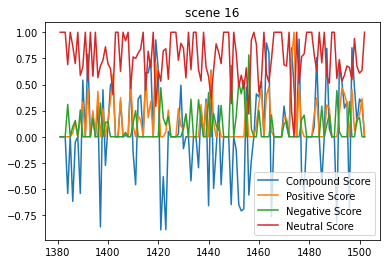

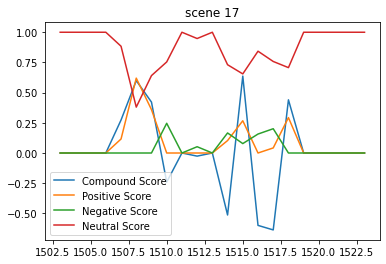

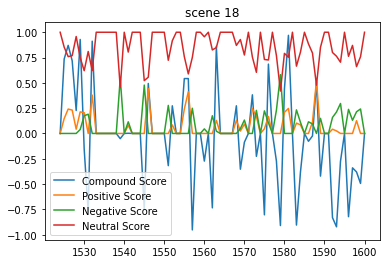

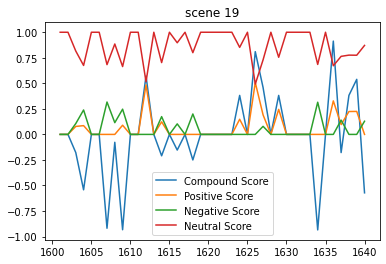

In [44]:
#for loop to loop through each scene and plot the values
comp=df1["compound"]
pos=df1["pos"]
neg=df1["neg"]
neu=df1["neu"]
scene_score=[]
for s in np.arange(1,len(sceneidx)): 
    #getting the four different sentiment scores for each scene
    com_score=comp[df1["scene"]==s]
    pos_score=pos[df1["scene"]==s]
    neg_score=neg[df1["scene"]==s]
    neu_score=neu[df1["scene"]==s]
    
    #getting the average score
    positive=sum(pos_score)/len(pos_score)
    negative=sum(neg_score)/len(pos_score)
    compound=sum(com_score)/len(com_score)
    neutral=sum(neu_score)/len(neu_score)
    
    #plotting the sentiment scores
    plt.plot(com_score, label = "Compound Score")
    plt.plot(pos_score, label = "Positive Score")
    plt.plot(neg_score, label = "Negative Score")
    plt.plot(neu_score, label = "Neutral Score")
    plt.title('scene '+str(s))
    plt.legend()
    plt.show()
    #storing the sentiment scores.
    scene_score.append([positive,negative*-1,compound, neutral])

In [45]:
#making a data frame to save the final values.
df_final=pd.DataFrame(scene_score)
df_final.columns=["pos", "neg", "comp", "neu"]
df_final

,pos,neg,comp,neu
0,0.079523,-0.070114,0.023431,0.850398
1,0.118131,-0.049662,0.104772,0.832223
2,0.123950,-0.067050,0.178532,0.809083
3,0.043451,-0.073275,-0.062618,0.883235
4,0.099531,-0.150965,0.002188,0.749504
5,0.104667,-0.069059,0.052531,0.826294
6,0.143361,-0.060595,0.124333,0.796061
7,0.176919,-0.059302,0.166830,0.763802
8,0.128624,-0.076128,0.075044,0.795252
9,0.125089,-0.115267,-0.014211,0.759622


In [46]:
#save dataframe to file
df_final.to_csv(r'Sentimentscores.csv', index = False)